In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
from joblib import dump

In [2]:
df = pd.read_csv('aufgabe_mle.csv')
df['community'] = df['NonEmployeeAnswersWithinWeek'].apply(lambda x: 1 if x > 0 else 0)

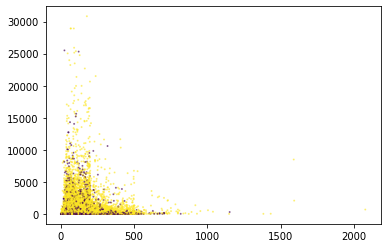

In [3]:
fig, ax = plt.subplots()
ax.scatter('QuestionText_nchars', 'VerfiedBuyersWithLanguage', c='community', data=df, s=1, alpha=0.5)

In [4]:
lr_clf = LogisticRegression(solver='lbfgs')
lr_clf.fit(df[['QuestionText_nchars', 'VerfiedBuyersWithLanguage']], df['community'])
dump(lr_clf, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [5]:
df['lr_p'] = lr_clf.predict(df[['QuestionText_nchars', 'VerfiedBuyersWithLanguage']])
df.loc[~(df['community'] == df['lr_p'])].count()[0]

21231